In [6]:
import os
os.getcwd()

'C:\\Users\\lenovo\\Desktop\\BI Project\\Heart-Disease-Prediction-master\\Boom_friend'

In [7]:
#os.chdir("C:/Users/rvrao/Downloads")
#os.getcwd()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc
import warnings
warnings.filterwarnings("ignore")


In [9]:
dataset = pd.read_csv('C:/Users/lenovo/Desktop/BI Project/Imp DS/HEART_3targets.csv')
#plt.figure(figsize=(10,10))
#sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
#plt.show()
#plt.figure(figsize=(10,10))
#sns.heatmap(dataset.corr(),vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
#plt.tight_layout()
#plt.show()
#sns.countplot(dataset.target)
#plt.xlabel('Target')
#plt.ylabel('Count')
#plt.title('Target Counter low, medium high')
#plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
for column in dataset.columns:
    if dataset[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [11]:
dataset.fillna(dataset.mean(), inplace=True)

In [13]:
dataset.isna().sum()
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,True,1,150,0,2.3,0,0,0,1
1,67,1,0,160,286,False,1,108,1,1.5,1,3,1,2
2,67,1,0,120,229,False,1,129,1,2.6,1,2,2,2
3,37,1,2,130,250,False,2,187,0,3.5,0,0,1,1
4,41,0,1,130,204,False,1,172,0,1.4,2,0,1,1


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int32
cp          303 non-null int32
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null bool
restecg     303 non-null int32
thalach     303 non-null int64
exang       303 non-null int32
oldpeak     303 non-null float64
slope       303 non-null int32
ca          303 non-null int64
thal        303 non-null int32
target      303 non-null int32
dtypes: bool(1), float64(1), int32(7), int64(5)
memory usage: 22.9 KB


In [46]:
dummy_data = pd.get_dummies(dataset,columns=["sex","cp","fbs","restecg","exang","slope","thal"], drop_first=True)

In [47]:
dummy_data

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_True,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2
0,63,145,233,150,2.3,0,1,1,0,0,1,1,1,0,0,0,0,0,0
1,67,160,286,108,1.5,3,2,1,0,0,0,0,1,0,1,1,0,1,0
2,67,120,229,129,2.6,2,2,1,0,0,0,0,1,0,1,1,0,0,1
3,37,130,250,187,3.5,0,1,1,0,1,0,0,0,1,0,0,0,1,0
4,41,130,204,172,1.4,0,1,0,1,0,0,0,1,0,0,0,1,1,0
5,56,120,236,178,0.8,0,1,1,1,0,0,0,0,1,0,0,1,1,0
6,62,140,268,160,3.6,2,0,0,0,0,0,0,1,0,0,0,0,1,0
7,57,120,354,163,0.6,0,1,0,0,0,0,0,0,1,1,0,1,1,0
8,63,130,254,147,1.4,1,2,1,0,0,0,0,1,0,0,1,0,0,1
9,53,140,203,155,3.1,0,2,1,0,0,0,1,1,0,1,0,0,0,1


In [48]:
#target = pd.get_dummies(dummy_data['target'])
predictors = dummy_data.drop('target',axis=1)

In [49]:
#target.head()

In [50]:
predictors.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_True,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2
0,63,145,233,150,2.3,0,1,0,0,1,1,1,0,0,0,0,0,0
1,67,160,286,108,1.5,3,1,0,0,0,0,1,0,1,1,0,1,0
2,67,120,229,129,2.6,2,1,0,0,0,0,1,0,1,1,0,0,1
3,37,130,250,187,3.5,0,1,0,1,0,0,0,1,0,0,0,1,0
4,41,130,204,172,1.4,0,0,1,0,0,0,1,0,0,0,1,1,0


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
for column in dataset.columns:
    if dataset[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [34]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.3,random_state=5)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [37]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
lr.predict(X_train.iloc[49].values.reshape(1,-1))
Y_train.iloc[49]

The accuracy score achieved using Logistic Regression is: 76.92 %


1

In [38]:
filename = 'finalheart_model.sav'
pickle.dump(lr, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [40]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 70.33 %


# SVM

In [41]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [42]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 71.43 %


# SVM_RBF

In [43]:
from sklearn import svm

sv = svm.SVC(kernel='poly')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [44]:
score_svm1 = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using rbf SVM is: "+str(score_svm)+" %")


The accuracy score achieved using rbf SVM is: 71.43 %


In [45]:
sv.predict(X_train.iloc[28].values.reshape(1,-1))
Y_train.iloc[28]

0

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [47]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")


The accuracy score achieved using KNN is: 61.54 %


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [49]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 60.44 %


# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [73]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using random forest classifier is: "+str(score_rf)+" %")
rf.predict(X_train.iloc[76].values.reshape(1,-1))
Y_train.iloc[76]


The accuracy score achieved using random forest classifier is: 82.42 %


2

In [74]:
filename = 'finalheart_rfmodel.sav'
pickle.dump(rf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

# XGBoost

In [57]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [58]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")


The accuracy score achieved using XGBoost is: 71.43 %


# AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada_model = AdaBoostClassifier(base_estimator=model, n_estimators=100, learning_rate=1)
ada_model.fit(X_train, Y_train)

Y_pred_ada = ada_model.predict(X_test)

score_ada = round(accuracy_score(Y_pred_ada,Y_test)*100,2)

print("The accuracy score achieved using AdaBoost is: "+str(score_ada)+" %")


The accuracy score achieved using AdaBoost is: 64.84 %


# Neural Networks

In [60]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [61]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

W0427 02:21:51.875457  5364 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0427 02:21:52.377147  5364 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0427 02:21:52.497504  5364 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0427 02:21:52.661112  5364 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0427 02:21:52.748199  5364 deprecation_wrapper.py:119] From C:\Users\lenovo

In [64]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
212/212 [==============================] - 0s 80us/step - loss: -2.1808 - acc: 0.5236
Epoch 2/10
212/212 [==============================] - 0s 56us/step - loss: -2.1808 - acc: 0.5236
Epoch 3/10
212/212 [==============================] - 0s 61us/step - loss: -2.1808 - acc: 0.5236
Epoch 4/10
212/212 [==============================] - 0s 61us/step - loss: -2.1808 - acc: 0.5236
Epoch 5/10
212/212 [==============================] - 0s 61us/step - loss: -2.1808 - acc: 0.5236
Epoch 6/10
212/212 [==============================] - 0s 61us/step - loss: -2.1808 - acc: 0.5236
Epoch 7/10
212/212 [==============================] - 0s 56us/step - loss: -2.1808 - acc: 0.5236
Epoch 8/10
212/212 [==============================] - 0s 104us/step - loss: -2.1808 - acc: 0.5236
Epoch 9/10
212/212 [==============================] - 0s 66us/step - loss: -2.1808 - acc: 0.5236
Epoch 10/10
212/212 [==============================] - 0s 94us/step - loss: -2.1808 - acc: 0.5236


In [65]:
Y_pred_nn = model.predict(X_test)

In [66]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [67]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 58.24 %


In [68]:
scores = [score_lr,score_nb,score_svm,score_svm1,score_knn,score_dt,score_rf,score_xgb,score_ada,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Support Vector Machine_rbf","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Adaboost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 76.92 %
The accuracy score achieved using Naive Bayes is: 70.33 %
The accuracy score achieved using Support Vector Machine is: 71.43 %
The accuracy score achieved using Support Vector Machine_rbf is: 65.93 %
The accuracy score achieved using K-Nearest Neighbors is: 61.54 %
The accuracy score achieved using Decision Tree is: 60.44 %
The accuracy score achieved using Random Forest is: 82.42 %
The accuracy score achieved using XGBoost is: 71.43 %
The accuracy score achieved using Adaboost is: 64.84 %
The accuracy score achieved using Neural Network is: 58.24 %


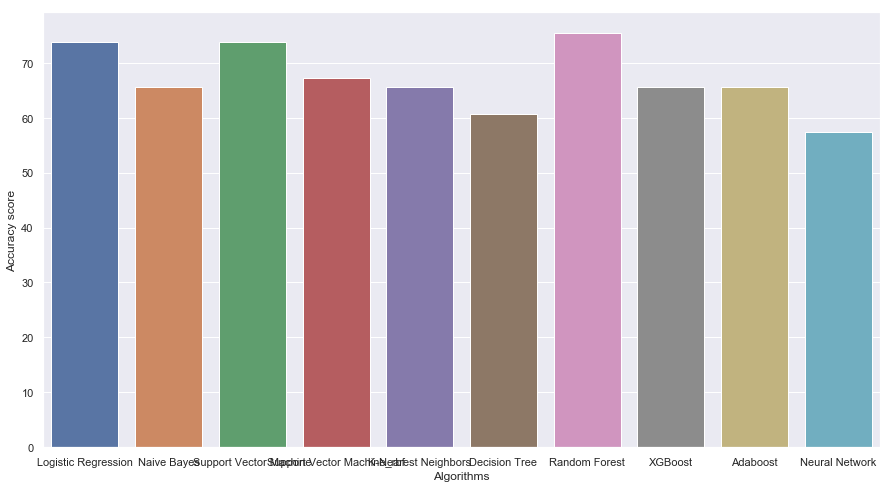

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [122]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(Y_test,Y_pred_lr)
cm_nb=confusion_matrix(Y_test,Y_pred_nb)
cm_svm=confusion_matrix(Y_test,Y_pred_svm)
cm_knn=confusion_matrix(Y_test,Y_pred_knn)
cm_dt=confusion_matrix(Y_test,Y_pred_dt)
cm_rf=confusion_matrix(Y_test,Y_pred_rf)
cm_xgb=confusion_matrix(Y_test,Y_pred_xgb)
cm_ada=confusion_matrix(Y_test,Y_pred_ada)
cm_nn=confusion_matrix(Y_test,Y_pred_nn)

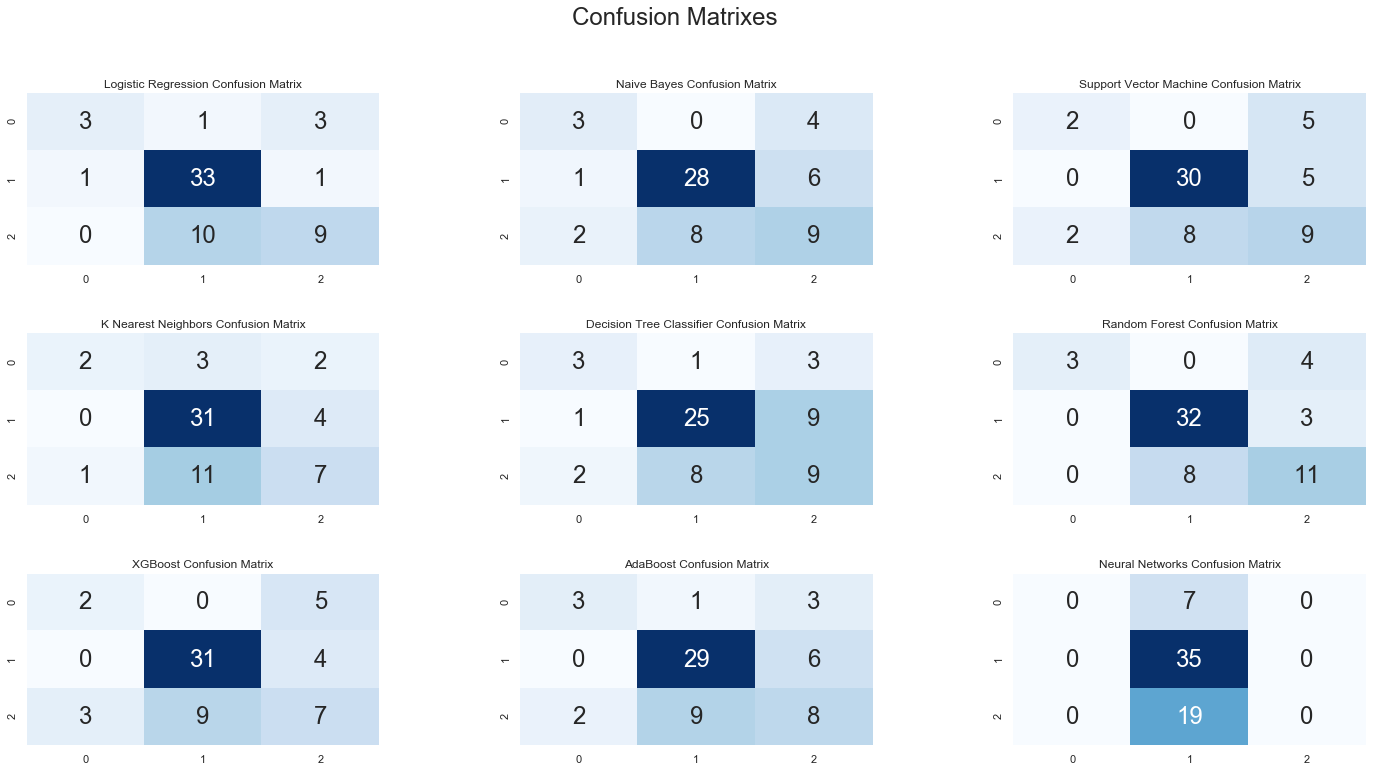

In [123]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("XGBoost Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("AdaBoost Confusion Matrix")
sns.heatmap(cm_ada,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,9)
plt.title("Neural Networks Confusion Matrix")
sns.heatmap(cm_nn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [70]:
scores = [score_nb,score_svm,score_rf,score_xgb]
algorithms = ["Naive Bayes","Support Vector Machine","Random Forest","XGBoost",]

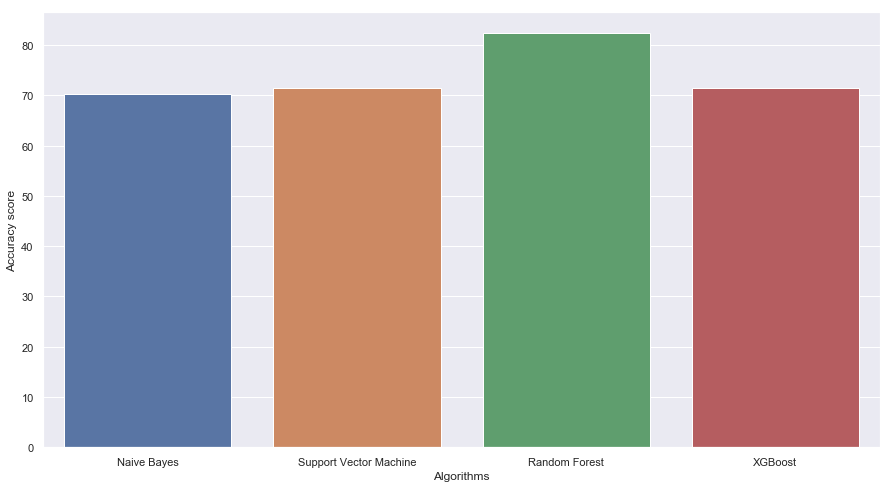

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)